In [1]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import copy
import random
%matplotlib inline

In [2]:
# uploaded = files.upload()
# df = pd.read_csv("housing.csv")

In [3]:
df = pd.read_csv('/content/housing.csv')

In [4]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
features = [
    'location', 'housing_median_age', 'population',
    'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df["location"] = df["latitude"] * df["longitude"]


df = df.dropna()

X = df[features].to_numpy()

Y = df['median_house_value'].to_numpy()


corr = df[['location', 'housing_median_age', 'population',
    'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']].corr()
print(corr)


                          location  housing_median_age  population  \
location                  1.000000           -0.033185    0.108632   
housing_median_age       -0.033185            1.000000   -0.295787   
population                0.108632           -0.295787    1.000000   
households                0.069245           -0.302768    0.907186   
median_income             0.059996           -0.118278    0.005087   
rooms_per_household      -0.090104           -0.153031   -0.071898   
bedrooms_per_room         0.110624            0.136089    0.035319   
population_per_household -0.001387            0.013258    0.070062   
median_house_value        0.105040            0.106432   -0.025300   

                          households  median_income  rooms_per_household  \
location                    0.069245       0.059996            -0.090104   
housing_median_age         -0.302768      -0.118278            -0.153031   
population                  0.907186       0.005087            -0.07189

In [6]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [7]:
indices = np.arange(len(X))
np.random.shuffle(indices)
X, Y = X[indices], Y[indices]
split = int(0.8 * len(X))
x_train, x_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

In [8]:
# fig, axes = plt.subplots(1, len(features), figsize=(120, 50))

# for i in range(len(features)):
#   axes[i].scatter(df[features[i]], y_train)


# plt.show()

In [9]:
b_init = 100
w_init = [0 for _ in range(len(x_train[0]))]

In [10]:
def predict(X, w, b):
    return X @ w + b

In [11]:
def compute_cost(X, y, w, b):
    errors = predict(X, w, b) - y
    return (errors @ errors) / (2 * len(y))

In [12]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(cost)

28180136600.53799


In [13]:
def compute_gradient(X, y, w, b):
    m = len(y)
    errors = predict(X, w, b) - y
    dj_dw = X.T @ errors / m
    dj_db = np.sum(errors) / m
    return dj_db, dj_dw

In [14]:
def gradient_descent(X, y, w, b, alpha, iterations):
    history = []
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(X, y, w, b)
        history.append(cost)
        if i % max(1, iterations // 20) == 0:
            print(f"Iter {i}: Cost={cost:.2e}")
    return w, b, history


alpha = 0.01

w, b, J_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, 3000)
print(w)

Iter 0: Cost=2.77e+10
Iter 150: Cost=4.45e+09
Iter 300: Cost=3.07e+09
Iter 450: Cost=2.90e+09
Iter 600: Cost=2.85e+09
Iter 750: Cost=2.82e+09
Iter 900: Cost=2.81e+09
Iter 1050: Cost=2.80e+09
Iter 1200: Cost=2.79e+09
Iter 1350: Cost=2.79e+09
Iter 1500: Cost=2.78e+09
Iter 1650: Cost=2.78e+09
Iter 1800: Cost=2.78e+09
Iter 1950: Cost=2.77e+09
Iter 2100: Cost=2.77e+09
Iter 2250: Cost=2.77e+09
Iter 2400: Cost=2.77e+09
Iter 2550: Cost=2.77e+09
Iter 2700: Cost=2.77e+09
Iter 2850: Cost=2.77e+09
[  5740.45635539  23456.74116194 -43600.11936154  50504.69118933
  95307.61048724   1587.19037667  24097.39874769   -466.43804489]


In [15]:
def evaluate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return mae, rmse, r2

y_pred = predict(x_test, w, b)
mae, rmse, r2 = evaluate_metrics(y_test, y_pred)
print(f"\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


MAE: 53326.50, RMSE: 73351.48, R²: 0.5869


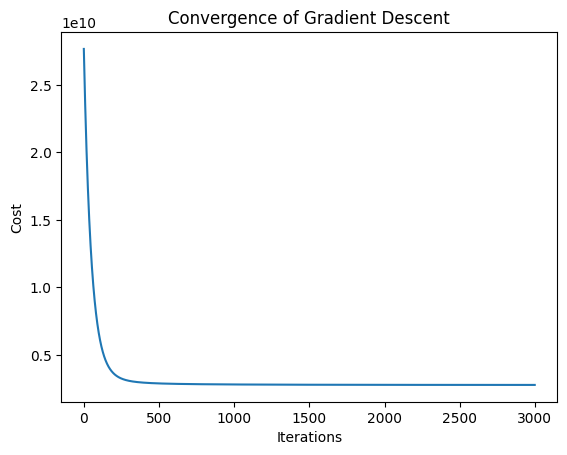

In [16]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Gradient Descent")
plt.show()
